In [1]:
import os
import shutil
import glob
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# Pandas for managing datasets
import pandas as pd
import numpy as np
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns


In [2]:
if len(glob.glob('ships')) == 0 :
    all_ships =  pd.read_csv("../data/resultsMediteranian_withRouteID_proper.csv")
    all_ships.sort_values('TIMESTAMP',inplace=True)
    all_ships = all_ships.reset_index(drop=True)
    ships_ids = all_ships["SHIP_ID"]
    unq_ships_ids = set(ships_ids)
    os.makedirs('ships')
    for x in unq_ships_ids:
        ship_data = all_ships['SHIP_ID'] == x
        ship = all_ships[ship_data][["TIMESTAMP","SHIPNAME","LAT","LON","HEADING"]]
        filename = 'ships/'+str(ship.iloc[0]["SHIPNAME"])+'.csv'
        ship.to_csv(path_or_buf=filename,index=False)
else:
    files = glob.glob("ships/*.csv")
    for file in files:
        ship =  pd.read_csv(file)
        shipname = ship.loc[0]["SHIPNAME"]
        ship = ship [["TIMESTAMP","LAT","LON","HEADING"]]
        ship.sort_values('TIMESTAMP',inplace=True)
        ship=ship.reset_index(drop=True)
        print(shipname)
        print(len(ship))
        print(str(ship.head(1)["TIMESTAMP"]),"------------------",str(ship.tail(1)["TIMESTAMP"]))
#         fig, ax = plt.subplots()
#         fig.set_size_inches(30, 20)
#         ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
#         ax.set_xlabel('Longitude ', fontsize = 20.0) # X label
#         ax.set_title(shipname)
#         # Plot using Seaborn
#         sns.lineplot(x='LON', y='LAT', data=ship.head(750), ax=ax,sort=False,marker="o")

FileNotFoundError: File b'../data/resultsMediteranian_withRouteID_proper.csv' does not exist

In [3]:
# ship =  pd.read_csv("ships/BOURBON ARGOS.csv")
# ship = ship [["TIMESTAMP","LAT","LON","HEADING"]]
# ship.sort_values('TIMESTAMP',inplace=True)
# ship=ship.reset_index(drop=True)
# from tools.utils import scale_down
# sd_data = scale_down(ship.head(750),25)
# fig, ax = plt.subplots()
# fig.set_size_inches(30, 20)
# ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
# ax.set_xlabel('Longitude ', fontsize = 20.0) # X label
# # Plot using Seaborn
# sns.lineplot(x='LON', y='LAT', data=sd_data, ax=ax,sort=False,marker="o")


In [4]:
# all_ships =  pd.read_csv("../data/resultsMediteranian_withRouteID.csv",sep=";")
# print(all_ships.head(2))
# print(all_ships.shape)
# all_ships.sort_values('TIMESTAMP',inplace=True)
# all_ships = all_ships.reset_index(drop=True)
# import locale
# from locale import atof
# locale.setlocale(locale.LC_NUMERIC, '')
# all_ships['LAT'] = all_ships['LAT'].apply(atof)
# all_ships['LON'] = all_ships['LON'].apply(atof)
# print(all_ships.head(2))
# all_ships.to_csv(path_or_buf="../data/resultsMediteranian_withRouteID_proper.csv",index=False)
# print(all_ships.shape)
# all_ships =  pd.read_csv("../data/resultsMediteranian_withRouteID_proper.csv")
# print(all_ships.head(2))
# print(all_ships.shape)


In [13]:
a =  pd.read_csv("ships/SIEM PILOT.csv")
shipname = a.loc[0]["SHIPNAME"]
a = a [["TIMESTAMP","LAT","LON","HEADING"]]
a['TIMESTAMP'] = pd.to_datetime(a['TIMESTAMP'])  
a.sort_values('TIMESTAMP',inplace=True)
labels = ["TIMESTAMP","LAT","LON","HEADING"]
real_data =  pd.read_csv("../data/route.csv")
real_data = real_data [labels][:500]
real_data['TIMESTAMP'] = pd.to_datetime(real_data['TIMESTAMP'])
real_data.sort_values('TIMESTAMP',inplace=True)
real_data=real_data.reset_index(drop=True)
start = real_data.head(1)["TIMESTAMP"].values
end = real_data.tail(1)["TIMESTAMP"].values
date_mask = (a["TIMESTAMP"].values>start) & (a["TIMESTAMP"].values<=end)
a=a[date_mask]

In [16]:
print(a.head(1)["TIMESTAMP"])
print(a.tail(1)["TIMESTAMP"])
print(len(a))

2309   2015-07-06 17:03:16
Name: TIMESTAMP, dtype: datetime64[ns]
2863   2015-07-07 15:59:15
Name: TIMESTAMP, dtype: datetime64[ns]
555


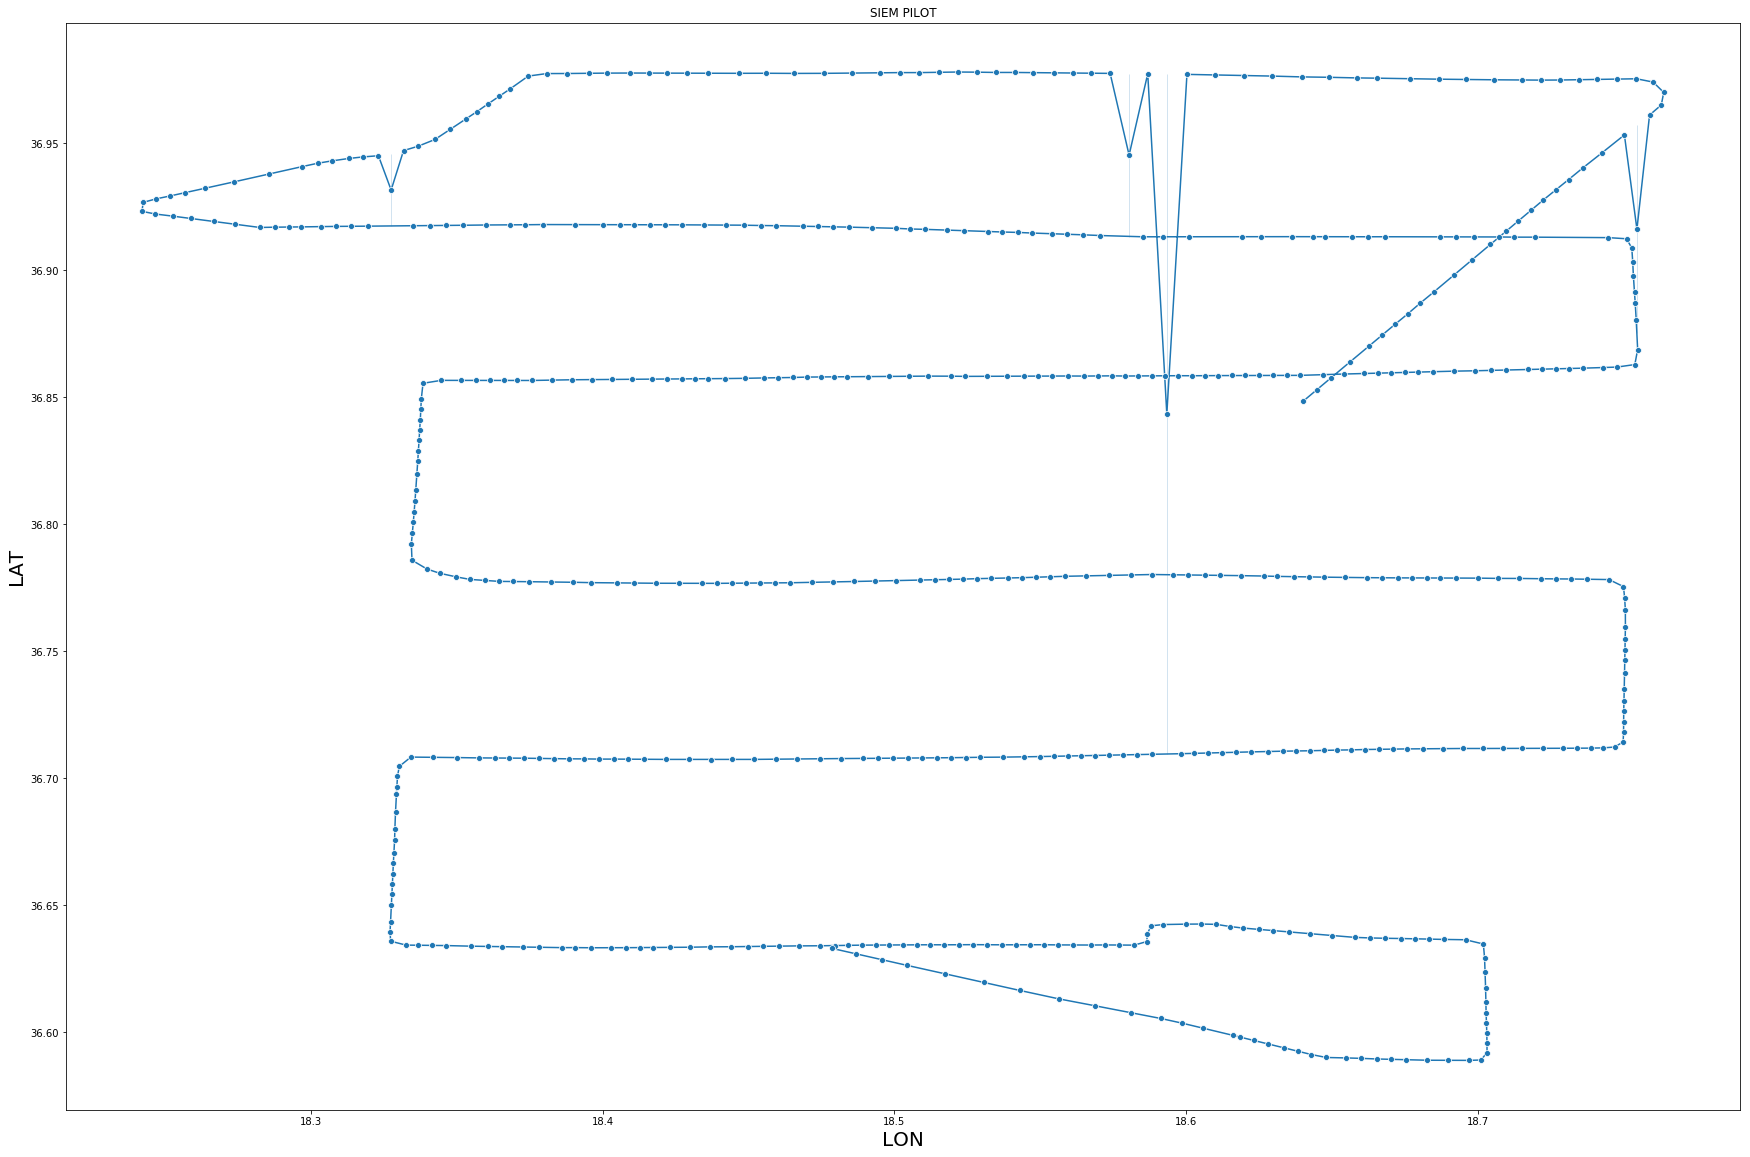

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
ax.set_xlabel('Longitude ', fontsize = 20.0) # X label
ax.set_title(shipname)
# Plot using Seaborn
sns.lineplot(x='LON', y='LAT', data=a, ax=ax,sort=False,marker="o")